<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/G%C3%B6zetimsiz%C3%96%C4%9Frenme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ppscore

In [ ]:
import numpy as np
import pandas as pd

import ppscore as pps

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6.3,4.725]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

plt.rcParams['font.size'] = 12

In [ ]:
df = pd.read_csv( '/content/Auto(refurbished).csv' )
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford
393,44.0,4,97.0,52.0,2130,24.6,82,2,volkswagen
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford


In [ ]:
#  Make sütunun sayısal dönüşümü
df.make.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'maxda', 'honda',
       'subaru', 'capri', 'mercedes-benz', 'cadillac', 'mercedes',
       'triumph', 'nissan'], dtype=object)

In [ ]:
df.make.replace( ['maxda',], 'mazda', inplace = True )

In [ ]:
df.make = \
[ list(df.make.unique()).index(i) for i in df.make ]

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,4
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,4
393,44.0,4,97.0,52.0,2130,24.6,82,2,9
394,32.0,4,135.0,84.0,2295,11.6,82,1,6
395,28.0,4,120.0,79.0,2625,18.6,82,1,4


In [ ]:
ppscore = pps.matrix( df )
ppscore

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,mpg,mpg,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,mpg,cylinders,0.668622,regression,True,mean absolute error,1.478589,0.489972,DecisionTreeRegressor()
2,mpg,displacement,0.579994,regression,True,mean absolute error,86.880353,36.490313,DecisionTreeRegressor()
3,mpg,horsepower,0.467431,regression,True,mean absolute error,28.471033,15.162792,DecisionTreeRegressor()
4,mpg,weight,0.537948,regression,True,mean absolute error,709.148615,327.663526,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
76,make,weight,0.263038,regression,True,mean absolute error,709.148615,522.615748,DecisionTreeRegressor()
77,make,acceleration,0.000000,regression,True,mean absolute error,2.130227,2.190856,DecisionTreeRegressor()
78,make,year,0.000000,regression,True,mean absolute error,3.168766,3.179314,DecisionTreeRegressor()
79,make,origin,0.978103,regression,True,mean absolute error,0.574307,0.012576,DecisionTreeRegressor()


In [ ]:
ppscore = ppscore.set_index(['y','x']).ppscore
ppscore

y             x   
mpg           mpg     1.000000
cylinders     mpg     0.668622
displacement  mpg     0.579994
horsepower    mpg     0.467431
weight        mpg     0.537948
                        ...   
              make    0.263038
acceleration  make    0.000000
year          make    0.000000
origin        make    0.978103
make          make    1.000000
Name: ppscore, Length: 81, dtype: float64

In [ ]:
sns.heatmap(
ppscore
)

IndexError: Inconsistent shape between the condition and the input (got (81, 1) and (81,))

Text(0.5, 1.0, 'Predictive Power Score Matrisi')

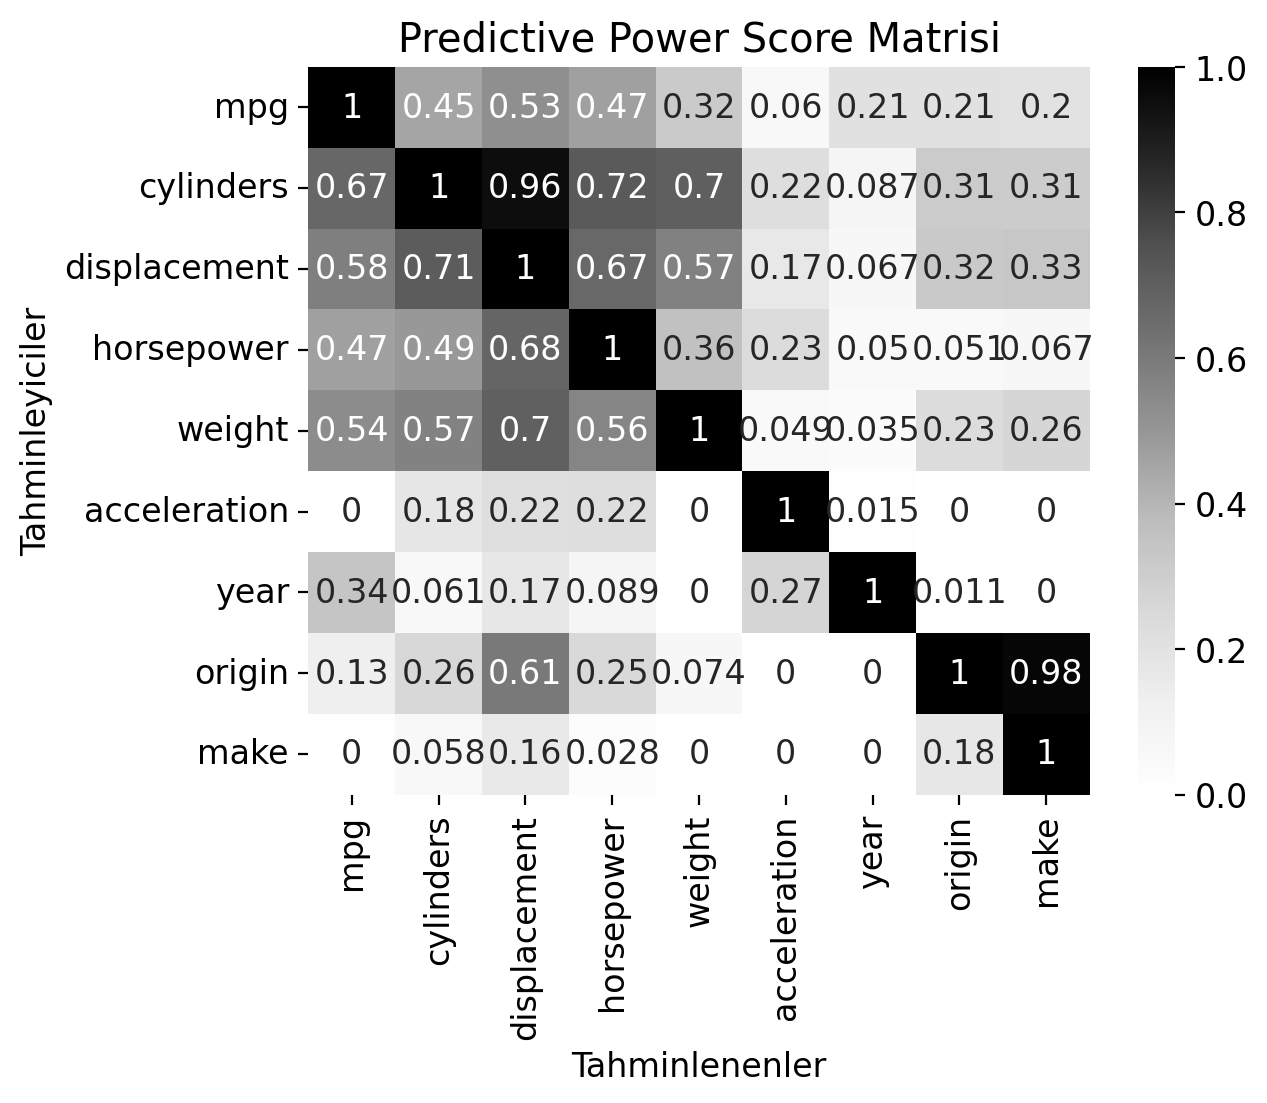

In [ ]:
sns.heatmap(
pd.DataFrame(
            index = df.columns,
            columns = df.columns,
            data = ppscore.values.reshape( len(df.columns), len(df.columns) )
            ).T,
annot = True,
cmap = 'Greys'
)

plt.xlabel('Tahminlenenler')
plt.ylabel('Tahminleyiciler')

plt.title('Predictive Power Score Matrisi')

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'make'],
      dtype='object')

In [ ]:
#   İvmelenme değerlerini tahmin etmek istiyoruz
# X_öğr = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin', 'make']].sample(
# frac = .8, random_state = 381
# )
X_öğr = df[['cylinders', 'displacement', 'horsepower', 'year',]].sample(
frac = .8, random_state = 381
)
# X_tst = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin', 'make']].loc[
# [i for i in df.index if i not in X_öğr.index]
# ]
X_tst = df[['cylinders', 'displacement', 'horsepower', 'year',]].loc[
[i for i in df.index if i not in X_öğr.index]
]

y_öğr = df[['acceleration']].sample(
frac = .8, random_state = 381
)
y_tst = df[['acceleration']].loc[
[i for i in df.index if i not in X_öğr.index]
]

In [ ]:
#   İvmelenme değerlerini tahmin etmek istiyoruz
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 381, max_depth = 5 ).fit(X_öğr, y_öğr)

from sklearn.metrics import mean_squared_error
mean_squared_error(
y_öğr,
model.predict(X_öğr),
),       mean_squared_error(
y_tst,
model.predict(X_tst),
)

<ipython-input-80-04914c2caf24>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state = 381, max_depth = 5 ).fit(X_öğr, y_öğr)


(2.0964220166049836, 2.160378646548622)

In [ ]:
U,D,V = np.linalg.svd(
df[['mpg','weight','origin','make']]
)
V

array([[-6.74482884e-03, -9.99974507e-01, -4.48818465e-04,
        -2.30031695e-03],
       [-9.18907720e-01,  7.12197750e-03, -6.33992620e-02,
        -3.89279350e-01],
       [ 3.91114164e-01, -5.12833970e-04, -1.90559952e-02,
        -9.20144726e-01],
       [ 5.09197369e-02,  7.06697112e-06, -9.97806194e-01,
         4.23081453e-02]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

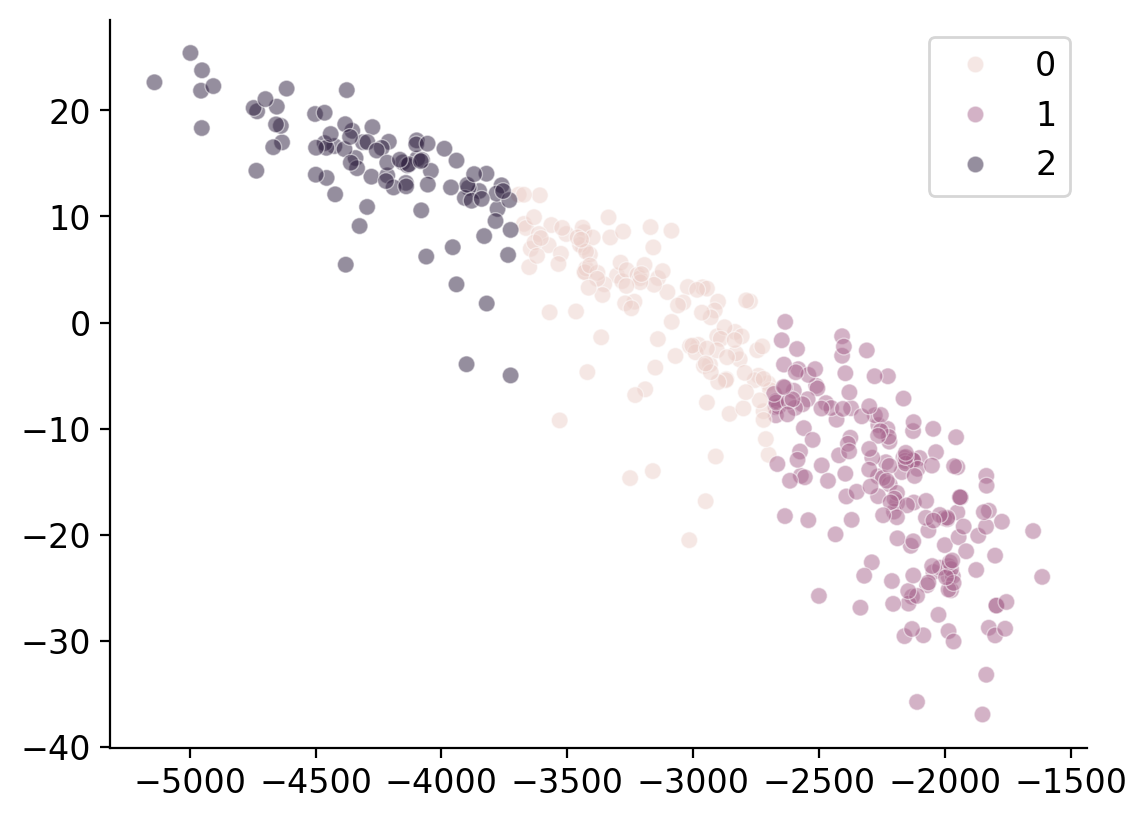

In [ ]:
from sklearn.cluster import KMeans

sns.scatterplot(
x = [i.sum() for i in V[0]*df[['mpg','weight','origin','make']].values],
y = [i.sum() for i in V[1]*df[['mpg','weight','origin','make']].values],
alpha = .5,
hue = KMeans(n_clusters=3).fit_predict(df[['mpg','weight','origin','make']].values)
)

In [ ]:
df.loc[:, 'Küme'] = KMeans(n_clusters=3).fit_predict(df[['mpg','weight','origin','make']].values)
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make,Küme
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,2,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,3,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,4,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,4,0
393,44.0,4,97.0,52.0,2130,24.6,82,2,9,2
394,32.0,4,135.0,84.0,2295,11.6,82,1,6,2
395,28.0,4,120.0,79.0,2625,18.6,82,1,4,2


In [ ]:
#   İvmelenme değerlerini tahmin etmek istiyoruz
# X_öğr = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin', 'make']].sample(
# frac = .8, random_state = 381
# )
X_öğr = df[['cylinders', 'displacement', 'horsepower', 'year', 'Küme']].sample(
frac = .8, random_state = 381
)
# X_tst = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin', 'make']].loc[
# [i for i in df.index if i not in X_öğr.index]
# ]
X_tst = df[['cylinders', 'displacement', 'horsepower', 'year', 'Küme']].loc[
[i for i in df.index if i not in X_öğr.index]
]

y_öğr = df[['acceleration']].sample(
frac = .8, random_state = 381
)
y_tst = df[['acceleration']].loc[
[i for i in df.index if i not in X_öğr.index]
]

In [ ]:
#   İvmelenme değerlerini tahmin etmek istiyoruz
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 381, max_depth = 5 ).fit(X_öğr, y_öğr)

from sklearn.metrics import mean_squared_error
mean_squared_error(
y_öğr,
model.predict(X_öğr),
),       mean_squared_error(
y_tst,
model.predict(X_tst),
)

<ipython-input-111-04914c2caf24>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state = 381, max_depth = 5 ).fit(X_öğr, y_öğr)


(1.8840291150379085, 2.075505782755442)